In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('kuisioner1.csv')
data.head()

,Timestamp,Nama,Program Studi,Tempat tinggal Anda sekarang,Koneksi internet dari mana yang biasa Anda gunakan untuk mengakses SISTER UNEJ?,Penyedia layanan Internet apa yang biasa Anda gunakan untuk mengakses SISTER UNEJ?,Berapa biaya yang Anda keluarkan setiap bulan untuk berlangganan Internet?,Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ sehari-hari?,Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ saat ada quiz/ujian?,Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ saat terjadi pemadaman listrik di wilayah tempat tinggal Anda?,Seberapa sering Anda mengalami masalah saat mengakses SISTER UNEJ?
0,07/06/2021 7:43:35,Dimas Rifriandi,Sistem Informasi,Blitar,Paket Data Seluler,3 (Tri),"Rp60.000,- s.d. Rp100.000,-",Lancar,Lancar,Lancar,Jarang
1,07/06/2021 8:00:42,Figo Perdana Putra,Teknologi Informasi,Probolinggo,Wi-Fi Rumah atau Pribadi,IndiHome,"Rp100.000,- s.d. Rp300.000,-",Lancar,Lancar,Lancar,Jarang
2,07/06/2021 8:03:02,Putri Wahyu,S1 Teknik Lingkungan,Tuban,Paket Data Seluler,Indosat Ooredoo,"Rp100.000,- s.d. Rp300.000,-",Cukup Lancar,Cukup Lancar,Tidak Lancar,Jarang
3,07/06/2021 8:09:04,Mohamad Akbar,Teknologi Informasi,Banyuwangi,Paket Data Seluler,Indosat Ooredoo,"Rp30.000,- s.d. Rp60.000,-",Cukup Lancar,Lancar,Cukup Lancar,Cukup Sering
4,07/06/2021 8:33:09,Fiesta Putra Reifa Al Ghifar,Teknologi informasi,Jember,Wi-Fi Rumah atau Pribadi,IndiHome,"Rp100.000,- s.d. Rp300.000,-",Lancar,Lancar,Cukup Lancar,Jarang


In [3]:
data = data[['Berapa biaya yang Anda keluarkan setiap bulan untuk berlangganan Internet?','Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ sehari-hari?']]
data.head()

,Berapa biaya yang Anda keluarkan setiap bulan untuk berlangganan Internet?,Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ sehari-hari?
0,"Rp60.000,- s.d. Rp100.000,-",Lancar
1,"Rp100.000,- s.d. Rp300.000,-",Lancar
2,"Rp100.000,- s.d. Rp300.000,-",Cukup Lancar
3,"Rp30.000,- s.d. Rp60.000,-",Cukup Lancar
4,"Rp100.000,- s.d. Rp300.000,-",Lancar


In [4]:
data = data.rename(columns={'Berapa biaya yang Anda keluarkan setiap bulan untuk berlangganan Internet?':'harga paket','Seberapa lancar Internet Anda dalam mengakses SISTER UNEJ sehari-hari?':'performa'})
data.head()

,harga paket,performa
0,"Rp60.000,- s.d. Rp100.000,-",Lancar
1,"Rp100.000,- s.d. Rp300.000,-",Lancar
2,"Rp100.000,- s.d. Rp300.000,-",Cukup Lancar
3,"Rp30.000,- s.d. Rp60.000,-",Cukup Lancar
4,"Rp100.000,- s.d. Rp300.000,-",Lancar


In [5]:
data['performa'].value_counts()

Lancar           17
Cukup Lancar     15
Sangat Lancar    10
Kurang Lancar     3
Name: performa, dtype: int64

In [6]:
harga = {
    'Di bawah Rp30.000,-' : 0,
    'Rp30.000,- s.d. Rp60.000,-' : 1,
    'Rp60.000,- s.d. Rp100.000,-' : 2,
    'Rp100.000,- s.d. Rp300.000,-' : 3,
    'Lebih dari Rp300.000,-' : 4
}

data['harga paket'] = data['harga paket'].replace(harga)
data['harga paket'].value_counts()

3    23
4    10
2     5
1     5
0     2
Name: harga paket, dtype: int64

In [7]:
performa = {
    'Lancar' : 2,
    'Cukup Lancar' : 1,
    'Sangat Lancar' : 3,
    'Kurang Lancar' : 0
}
data['performa'] = data['performa'].replace(performa)
data['performa'].value_counts()

2    17
1    15
3    10
0     3
Name: performa, dtype: int64

In [8]:
data.describe()

,harga paket,performa
count,45.000000,45.000000
mean,2.755556,1.755556
std,1.069315,0.883062
min,0.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,4.000000,3.000000


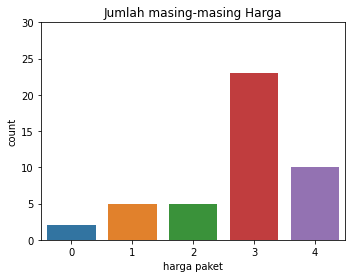

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,2)
plt.title("Jumlah masing-masing Harga")
plt.ylim(top=30)
sns.countplot(data=data, x='harga paket')
plt.show()

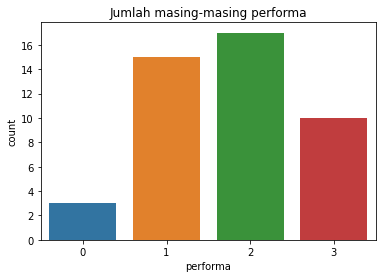

In [11]:
sns.countplot(data=data, x='performa')
plt.title("Jumlah masing-masing performa")
plt.show()

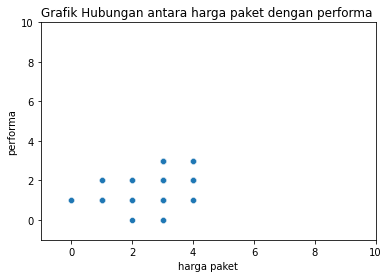

In [12]:
plt.xlim(right=10, left=-1) #xmin is your value
plt.ylim(top=10,bottom=-1) #ymax is your value
plt.title("Grafik Hubungan antara harga paket dengan performa ")
sns.scatterplot(data=data, x="harga paket", y="performa")
plt.show()

In [13]:
x = data['harga paket'].values.reshape(-1,1)
y = data['performa'].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=21, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_) # nilai b
print(lin_reg.intercept_) # nilai a

[[0.2516129]]
[1.05806452]


0 -> 'Di bawah Rp30.000,-'
4 -> 'Lebih dari Rp300.000,-',
3 -> 'Rp100.000,- s.d. Rp300.000,-'
1 -> 'Rp30.000,- s.d. Rp60.000,-',
2 -> 'Rp60.000,- s.d. Rp100.000,-']

1 -> 'Cukup Lancar'
0 -> 'Kurang Lancar'
2 -> 'Lancar'
3 -> 'Sangat Lancar'

In [16]:
performa = [0,1,2,3,4]
for performa in performa:
    print("harga", performa, end=" performa = ")
    print(lin_reg.predict([[performa]]))

harga 0 performa = [[1.05806452]]
harga 1 performa = [[1.30967742]]
harga 2 performa = [[1.56129032]]
harga 3 performa = [[1.81290323]]
harga 4 performa = [[2.06451613]]
